In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots

# Autocorrelation in time series data

En el campo del análisis de las series temporales, la autocorrelación hace referencia a la correlación de nuestra serie temporal con una versión retardada de esta misma. Por ejemplo, una autocorrelación de orden 3 nos retorna la autocorrelación entre la serie temporal original y sus valores retardados 3 unidades. El plot de la autocorrelación (ACF) es muy común usarlo para ver la autocorrelación de nuestra serie. Python dispone de la función **plot_acf()** en la librería **statsmodels** que nos permite visualizar el gráfico.

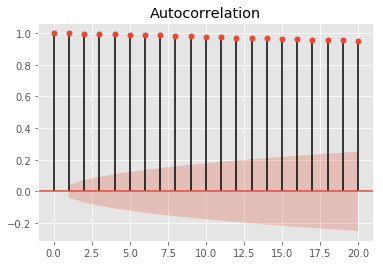

In [30]:
#Cargamos los datos
plt.style.use('ggplot')
co2_serie = pd.read_csv('ch2_co2_levels.csv', index_col = 0, parse_dates = True, squeeze = True)
co2_serie = co2_serie.fillna(method = 'bfill')
#Vemos su ACF
fig = tsaplots.plot_acf(co2_serie, lags = 20)
plt.show()

Si los valores de nuestro gráfico de autocorrelación están muy cercanos a cero esto quiero decir , que los valores entre observaciones consecutivas no estań correlados unos con otros. Inversamente correlaciones con valores cercanos a 1 o -1 que exista una fuerte correlación positiva o negativa entre observaciones consecutivas.
Para ver como de confiables son estos valores de autocorrelación, el **plot_acf()** nos retorna intervalos de confianza (son las zonas sombreadas), si un valor de autocorrelación queda por encima de esta región sombreada podemos asumir que se trata de un valor estadísticamente significativo.

# Partial autocorrelation in time series data

Como la autocorrelación, la función de autocorrelación parcial (PACF) mide el coeficiente de correlación entre una serie temporal con su versión retardada. Pero además elimina los efectos de los puntos anteriores. Por ejemplo, la PACF de orden 3 nos devolverá la correlación entre (t1,t2,t3) con (t4,t5,t6) pero antes eliminará la influencia de los puntos con un lag de 1 y 2. Python dispone de la función **plot_pacf()** en la librería **statsmodels** que nos permite visualizar el gráfico.

In [ ]:
fig = tsaplots.plot_pacf(co2_serie, lag = 24)
plt.show()

Si la autocorrelación parcial toma valores muy cercanos a cero, entonces observaciones y observaciones retardadas no están correladas la una con la otra. Inversamente, si la autocorrelación parcial con valores cercanos a 1 o -1  indica que existe una fuerte correlación positiva o negativa entre observaciones lageadas de nuestra serie temporal. Al igual que la gráfica **acf** nuestra gráfica **pacf** muestra unas regiones sombreadas, de forma que si la autocorrelación parcial está por encima significa que es estadísticamente significativa.

# Time series decomposition

Cuando visualizamos una serie temporal, deberíamos de distinguir algunos patrones en nuestra serie:

* Estacionalidad

* Tendencia

* Ruido

Python dispone de un método que nos permite descomponer nuestra serie en estas tres componentes, esta es la función **seasonal_decompose**.

In [34]:
import statsmodels.api as sm

#Hacemos las descomposición 
decomposition = sm.tsa.seasonal_decompose(co2_serie)

#Mostramos la componente estacional 
print(decomposition.seasonal.head())

datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
Name: co2, dtype: float64


# Plot individual components

También podemos seleccionar las otras dos componentes y representarlas por separada o usarlas de alguna manera que nos permita aportar información a nuestros modelos predictivos.

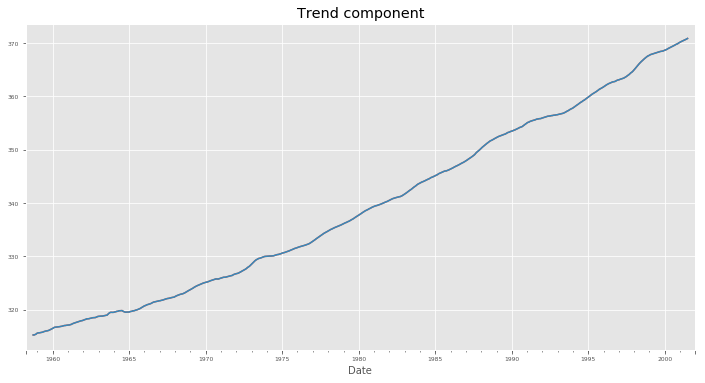

In [37]:
#Extraemos la tendencia
trend = decomposition.trend

#Visualizamos la tendencia
ax = trend.plot(figsize = (12,6), fontsize = 6)
ax.set_xlabel('Date', fontsize = 10)
ax.set_title('Trend component')
plt.show()